In [22]:
import pandas as pd
import requests
%matplotlib inline

In [2]:
r = []
for i in range(1,10):
    request_string = 'https://data.police.uk/api/crimes-street/all-crime?poly=52.268,0.543:52.794,0.238:52.130,0.478&date=2020-0' + str(i)
    r.append(requests.get(request_string))
r

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [13]:
police_df = pd.DataFrame()
for i in range(0,9):
    f = open("police" + str(i) + '.json', "w")
    f.write(r[i].text)
    f.close()
    temp_df = pd.read_json("police" + str(i) + '.json')
    police_df = pd.concat([police_df, temp_df], ignore_index = True)
police_df

,category,location_type,location,context,outcome_status,persistent_id,id,location_subtype,month
0,anti-social-behaviour,Force,"{'latitude': '52.342301', 'street': {'id': 564...",,None,,80278712,,2020-01
1,anti-social-behaviour,Force,"{'latitude': '52.305582', 'street': {'id': 114...",,None,,80238748,,2020-01
2,anti-social-behaviour,Force,"{'latitude': '52.351159', 'street': {'id': 114...",,None,,80238699,,2020-01
3,anti-social-behaviour,Force,"{'latitude': '52.306775', 'street': {'id': 113...",,None,,80238736,,2020-01
4,anti-social-behaviour,Force,"{'latitude': '52.250164', 'street': {'id': 114...",,None,,80279079,,2020-01
...,...,...,...,...,...,...,...,...,...
942,violent-crime,Force,"{'latitude': '52.181653', 'street': {'id': 559...",,"{'category': 'Unable to prosecute suspect', 'd...",1b1f31baf5740ee9f43b05850b22e924c0bd61550f3e06...,86656492,,2020-09
943,violent-crime,Force,"{'latitude': '52.526059', 'street': {'id': 990...",,"{'category': 'Unable to prosecute suspect', 'd...",9652aec7c9bb2d49271e17a40b57e59733f907e732be51...,86692419,,2020-09
944,violent-crime,Force,"{'latitude': '52.359631', 'street': {'id': 114...",,"{'category': 'Unable to prosecute suspect', 'd...",0d9118b44c5dbc1e1f2f3f388f10be0cdccb7dc95a8941...,86696029,,2020-09
945,violent-crime,Force,"{'latitude': '52.252520', 'street': {'id': 114...",,{'category': 'Formal action is not in the publ...,0c31a65b770a0d284922c6ef6bd0a8bd975c19a6f05ca9...,86697011,,2020-09


In [20]:
crime_stats = pd.DataFrame()
crime_stats['month'] = police_df.month.unique()
for n in crime_stats.month:
    crime_stats.loc[crime_stats.month == n, 'crime_count'] = sum(police_df.month == n)
crime_stats

,month,crime_count
0,2020-01,90.0
1,2020-02,81.0
2,2020-03,95.0
3,2020-04,107.0
4,2020-05,114.0
5,2020-06,127.0
6,2020-07,127.0
7,2020-08,116.0
8,2020-09,90.0


<AxesSubplot:xlabel='month'>

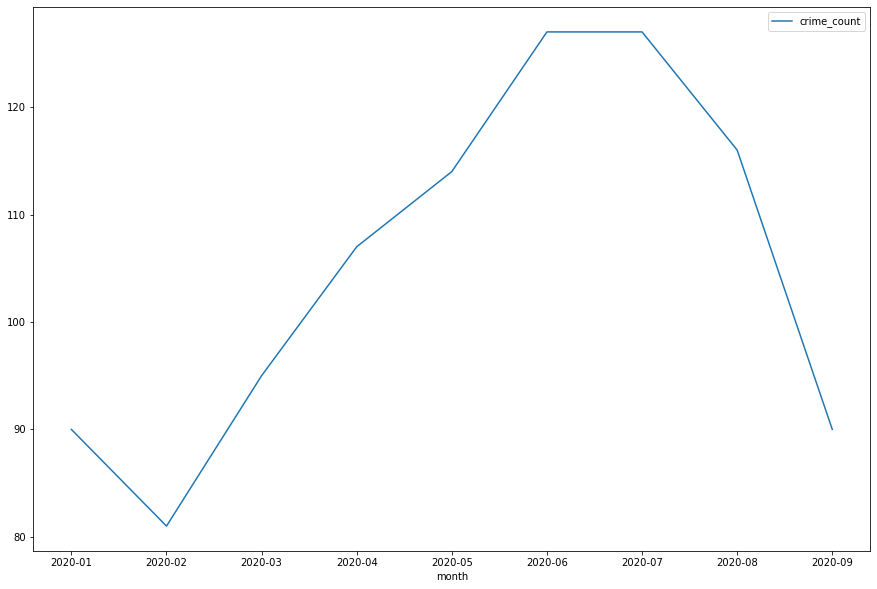

In [28]:
crime_stats.plot(kind = 'line',x = 'month', figsize = (15,10))